In [11]:
!pip install mtcnn

  Using cached mtcnn-0.1.1-py3-none-any.whl.metadata (5.8 kB)
Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)


In [2]:
import torch 
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
# from tqdm.notebook import tqdm

In [3]:
model = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [4]:
model

< cv2.CascadeClassifier 0x7fa2785a7d50>

In [28]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    faces = model.detect_faces(frame)
    for face in faces:
        x, y, w, h = face['box']
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow('MTCNN', frame) #I think frame is the actual photo
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step


In [29]:
cap.release()
cv2.destroyAllWindows()

In [162]:
#NMS 
# probs = model(img)[0].boxes.conf
# boxes = model(img)[0].boxes.xyxy #bl, tr 

def checkWithin(box1, box2):
    print('error here? ', len(box1), len(box2))
    bl_y = max(box1[1], box2[1])
    bl_x = max(box1[0], box2[0])
    tr_y = min(box1[3], box2[3])
    tr_x = min(box1[2], box2[2])
    print('ereached here? ', len(box1), len(box2))

    intersection = max((tr_y - bl_y), 0)  * max((tr_x - bl_x),0)
    union = (box1[3] - box1[1]) * (box1[2] - box1[0]) + (box2[3] - box2[1]) * (box2[2] - box2[0]) - max(0, intersection)
    print('intersection', intersection, 'union', union)
    return (intersection / union) > 0.5

def get_next_max(seen, confidence):
    max = -1
    for i in range(len(confidence)):
        if (i in seen):
            continue
        else:
            max = i if confidence[i] > max else max
    return max



def nms(result, get_max=None, seen=set()):
    if (not result.boxes):
        return result
    boxes = result.boxes.xyxy if result.boxes is not None  and result.boxes.xyxy is not None else None
    confidence = result.boxes.conf
    prob_max = get_max if get_max else np.argmax(np.array(confidence))
    i = 0 
    print('initial lenght', len(boxes))
    while (i < len(boxes)):
        if i == prob_max or i in seen:
            i+=1
            continue 
        # print('indices HEREEEE', len(boxes), len(confidence), i)
        if (checkWithin(boxes[i], boxes[prob_max])):
            
            if (i != len(boxes)):
                boxes = torch.cat([boxes[:i], boxes[i+1:]]) 
                confidence = torch.cat([confidence[:i], confidence[i+1:]])
            else:
                boxes = boxes[:i]
                confidence =confidence[:i]
            prob_max = np.argmax(np.array(confidence))
            # result.boxes.xyxy = boxes
            # result.boxes.conf = confidence
            i -= 1
            print('Confidence score: ', confidence[i], '\n Checking result ', result.boxes.xyxy, '\n Checking confidence', result.boxes.conf, '\n checking pass by ref confidence',  confidence)
        i += 1
    # seen = set() if not seen else seen
    seen.add(prob_max)
    get_max = get_next_max(seen, confidence)
    if (get_max == -1):
        return result
    else:
        print(get_max, seen)
        return nms(result, get_max, seen)

# result = model(img).copy()[0]
# nms(result)

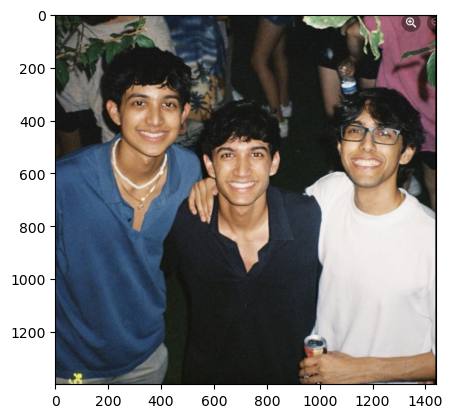

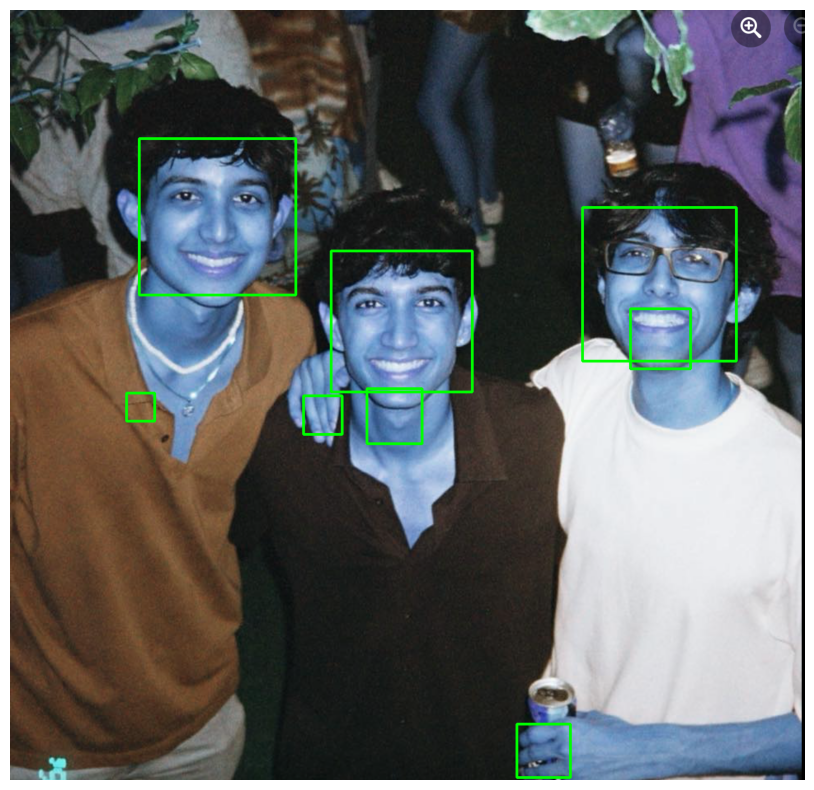

In [21]:
%matplotlib inline
def read_file_display(file):
    img = cv2.imread(file)
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = model.detectMultiScale(
    image, scaleFactor=1.1, minNeighbors=1, minSize=(40, 40)
)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
        plt.imshow(image)
    # img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.axis('off')
read_file_display('patels.png')

In [166]:
# a,b = [1,2]
# print(a,b)

1 2


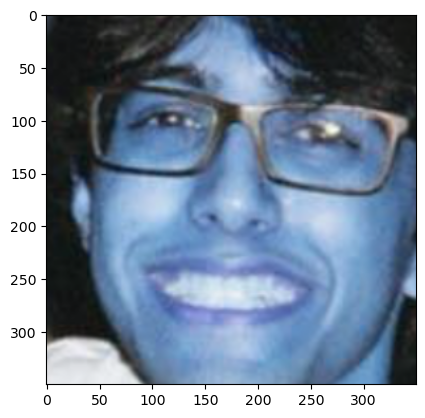

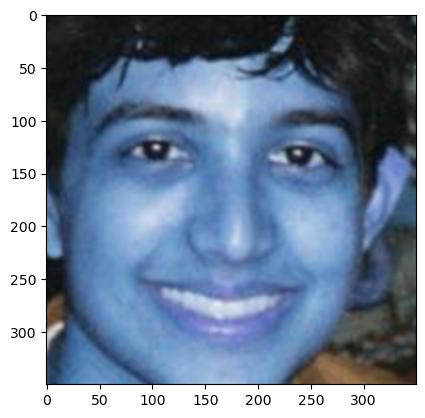

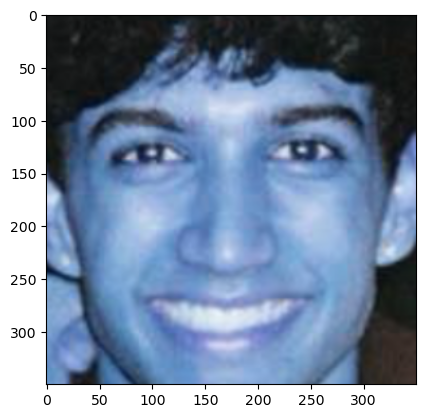

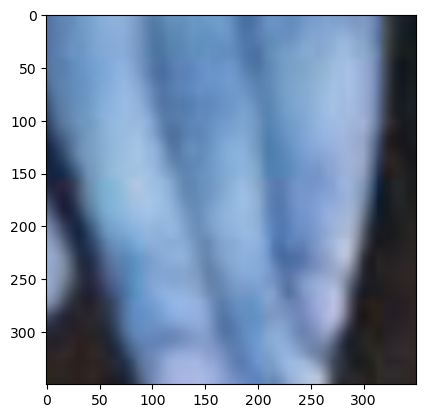

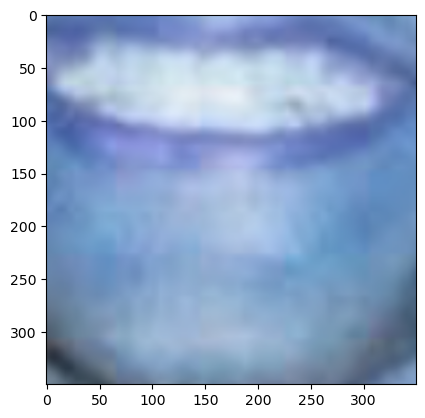

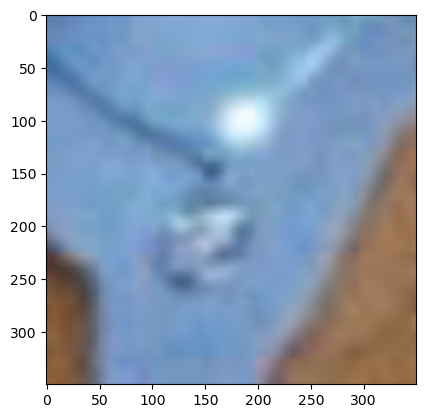

In [15]:
%matplotlib inline
def crop_images(image, boxes):
    images_cropped = [] 
    for box in boxes:
        x,y,w,h = box
        # print(int(x_l), y_l, x_r, y_r)
        new_image = image[int(y):int(y + h), int(x):int(x + w)]
        new_image = cv2.resize(new_image, (350, 350))
        images_cropped.append(new_image)
        
    return images_cropped

# f, axarr = plt.subplots(4,1) 
def display_images(image, model):
    boxes = model.detectMultiScale(
        image, scaleFactor=1.1, minNeighbors=3, minSize=(40, 40))
    cropped_images = crop_images(image, boxes)
    for i in cropped_images:
        plt.imshow(i)
        plt.show()

display_images(cv2.imread('patels.png'), model)


In [136]:
cap.release()
cv2.destroyAllWindows() 

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() 
    results = model(frame)
    result = nms(results[0], get_max=None, seen=set())
    boxed_output = (result.plot())
    cv2.imshow('YOLO', boxed_output)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break 
    # time.sleep(1.5)
cap.release()
cv2.destroyAllWindows() 

In [ ]:
model(img)[0].boxes.xyxy

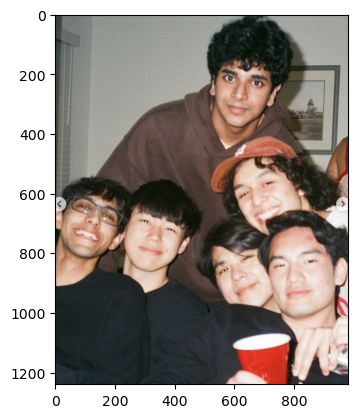

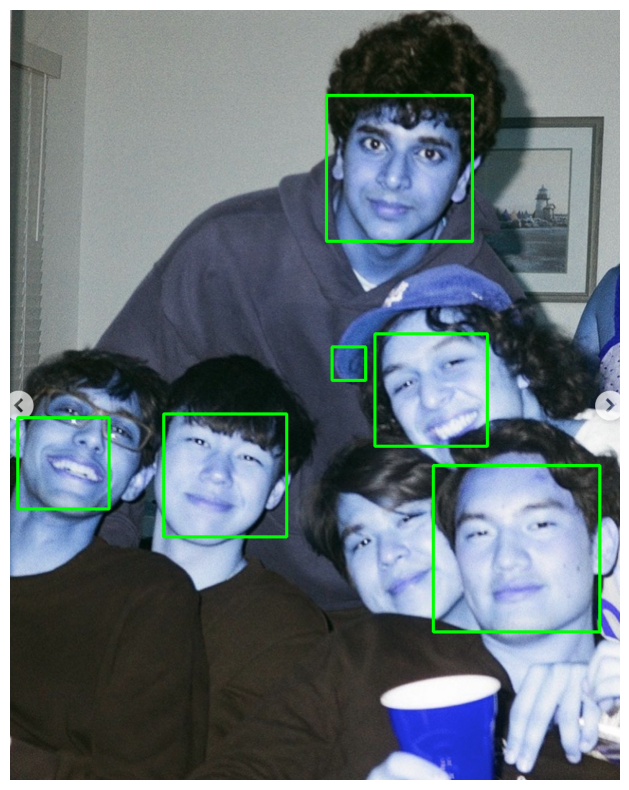

In [22]:
image = cv2.imread('./test_images/sidhu3.png')
read_file_display('./test_images/sidhu3.png')